# Python Basic Librabries importing

In [38]:
import numpy as nm #High level Mathematical functioning 
import pandas as pa #Input orOutput file processing 

#import sys
#!{sys.executable} -m pip install sklearn

import sklearn as sk

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer

import tensorflow as ten

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import Model
from keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import matplotlib.pyplot as mplot

# Retrieve Data from Datasets

In [13]:
df1 = pa.read_csv('D:\Jupyter\Class_dataset.csv')

In [14]:
df1.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


# Processing the Data - Retrieving Future Space

In [15]:
a = df1.iloc[:, 4:]
a.head()

,Ia,Ib,Ic,Va,Vb,Vc
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


# Target Column Mining based on the G,C,B,A Columns

In [16]:
df1['fault_type'] = df1['G'].astype('str') + df1['C'].astype('str') + df1['B'].astype('str') + df1['A'].astype('str')
df1.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [17]:
df1['fault_type'] = df1['fault_type'].astype('category')
df1['fault_type']

0       1001
1       1001
2       1001
3       1001
4       1001
        ... 
7856    0000
7857    0000
7858    0000
7859    0000
7860    0000
Name: fault_type, Length: 7861, dtype: category
Categories (6, object): ['0000', '0110', '0111', '1001', '1011', '1111']

# Classifying fault types 

In [18]:
fault_type_assign = {'0000': 'No Fault',
                          '1001': 'LG',
                          '0011': 'LL',
                          '1011': 'LLG',
                          '0111': 'LLL',
                          '1111': 'LLLG'}

In [19]:
fault_type_assign

{'0000': 'No Fault',
 '1001': 'LG',
 '0011': 'LL',
 '1011': 'LLG',
 '0111': 'LLL',
 '1111': 'LLLG'}

In [20]:
df1['fault_type'] = df1['fault_type'].astype('category')
df1['fault_type']

0       1001
1       1001
2       1001
3       1001
4       1001
        ... 
7856    0000
7857    0000
7858    0000
7859    0000
7860    0000
Name: fault_type, Length: 7861, dtype: category
Categories (6, object): ['0000', '0110', '0111', '1001', '1011', '1111']

In [21]:
ylb = LabelBinarizer().fit_transform(df1['fault_type'])
ylb

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [27]:
train_x, test_x = train_test_split(a, test_size=0.2, random_state=42)
train_y, test_y= train_test_split(ylb, test_size=0.2, random_state=42)

In [57]:
train_y, test_y

(array([[0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0]]),
 array([[1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0],
        ...,
        [1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1]]))

# Feature Space Scaling

In [28]:
t = MinMaxScaler()
t.fit(train_x)
scaled_train_x= t.transform(train_x)
scaled_test_x = t.transform(test_x)
scaled_x = t.transform(a)

# Creating Model and Training Data

In [29]:
def model_creator():
    input = Input(shape = 6, name = 'ipLayer')
    e = Dense(6, name = 'hiddenLayer_1', activation = 'relu')(input)
    e = Dense(6, name = 'hiddenLayer_2', activation = 'relu')(e)
    e = Dense(6, name = 'hiddenLayer_3', activation = 'relu')(e)
    classifier = Dense(6, activation= 'softmax', name = 'classifer') (e)

    model = Model(inputs = input, outputs = classifier)
    return model

# Compiling the model and Instance cretation 

In [25]:
model = model_creator()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training Model

In [30]:
model_history = model.fit(scaled_train_x,train_y,validation_data=(scaled_test_x, test_y), epochs=750)

Epoch 1/750
197/197 [==============================] - 4s 5ms/step - loss: 1.7252 - accuracy: 0.2988 - val_loss: 1.6752 - val_accuracy: 0.3064
Epoch 2/750
197/197 [==============================] - 0s 2ms/step - loss: 1.6172 - accuracy: 0.3314 - val_loss: 1.5264 - val_accuracy: 0.4024
Epoch 3/750
197/197 [==============================] - 0s 2ms/step - loss: 1.4009 - accuracy: 0.4281 - val_loss: 1.2636 - val_accuracy: 0.4558
Epoch 4/750
197/197 [==============================] - 0s 2ms/step - loss: 1.1790 - accuracy: 0.4981 - val_loss: 1.0921 - val_accuracy: 0.5334
Epoch 5/750
197/197 [==============================] - 0s 2ms/step - loss: 1.0461 - accuracy: 0.5528 - val_loss: 0.9889 - val_accuracy: 0.5531
Epoch 6/750
197/197 [==============================] - 0s 2ms/step - loss: 0.9605 - accuracy: 0.5841 - val_loss: 0.9146 - val_accuracy: 0.5900
Epoch 7/750
197/197 [==============================] - 1s 3ms/step - loss: 0.9029 - accuracy: 0.6032 - val_loss: 0.8635 - val_accuracy: 0.6084

Epoch 58/750
197/197 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.7820 - val_loss: 0.4363 - val_accuracy: 0.7883
Epoch 59/750
197/197 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.7807 - val_loss: 0.4269 - val_accuracy: 0.8099
Epoch 60/750
197/197 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.7859 - val_loss: 0.4209 - val_accuracy: 0.7915
Epoch 61/750
197/197 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.7871 - val_loss: 0.4197 - val_accuracy: 0.8080
Epoch 62/750
197/197 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.7882 - val_loss: 0.4149 - val_accuracy: 0.8017
Epoch 63/750
197/197 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.7921 - val_loss: 0.4134 - val_accuracy: 0.8086
Epoch 64/750
197/197 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.7918 - val_loss: 0.4100 - val_accuracy:

Epoch 115/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8088 - val_loss: 0.3605 - val_accuracy: 0.8334
Epoch 116/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3720 - accuracy: 0.8106 - val_loss: 0.3522 - val_accuracy: 0.8226
Epoch 117/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8138 - val_loss: 0.3520 - val_accuracy: 0.8296
Epoch 118/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3693 - accuracy: 0.8192 - val_loss: 0.3580 - val_accuracy: 0.8366
Epoch 119/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8082 - val_loss: 0.3711 - val_accuracy: 0.8150
Epoch 120/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8120 - val_loss: 0.3568 - val_accuracy: 0.8303
Epoch 121/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8120 - val_loss: 0.3428 - val_ac

197/197 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8290 - val_loss: 0.2928 - val_accuracy: 0.8468
Epoch 228/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8278 - val_loss: 0.2927 - val_accuracy: 0.8455
Epoch 229/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8302 - val_loss: 0.2941 - val_accuracy: 0.8462
Epoch 230/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8246 - val_loss: 0.2985 - val_accuracy: 0.8462
Epoch 231/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8281 - val_loss: 0.2944 - val_accuracy: 0.8487
Epoch 232/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8265 - val_loss: 0.2982 - val_accuracy: 0.8525
Epoch 233/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.8309 - val_loss: 0.3159 - val_accuracy: 0.8436

197/197 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.8309 - val_loss: 0.2852 - val_accuracy: 0.8538
Epoch 340/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8317 - val_loss: 0.2866 - val_accuracy: 0.8474
Epoch 341/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8327 - val_loss: 0.2783 - val_accuracy: 0.8506
Epoch 342/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8329 - val_loss: 0.3004 - val_accuracy: 0.8487
Epoch 343/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.8313 - val_loss: 0.3111 - val_accuracy: 0.8373
Epoch 344/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8360 - val_loss: 0.2925 - val_accuracy: 0.8430
Epoch 345/750
197/197 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8308 - val_loss: 0.2831 - val_accuracy: 0.8506

197/197 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.8351 - val_loss: 0.2712 - val_accuracy: 0.8487
Epoch 452/750
197/197 [==============================] - 1s 3ms/step - loss: 0.2855 - accuracy: 0.8403 - val_loss: 0.2721 - val_accuracy: 0.8487
Epoch 453/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2885 - accuracy: 0.8357 - val_loss: 0.2671 - val_accuracy: 0.8512
Epoch 454/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.8348 - val_loss: 0.2787 - val_accuracy: 0.8487
Epoch 455/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.8309 - val_loss: 0.2684 - val_accuracy: 0.8512
Epoch 456/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2860 - accuracy: 0.8384 - val_loss: 0.2747 - val_accuracy: 0.8595
Epoch 457/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2841 - accuracy: 0.8405 - val_loss: 0.2664 - val_accuracy: 0.8500

197/197 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.8418 - val_loss: 0.2609 - val_accuracy: 0.8512
Epoch 564/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2780 - accuracy: 0.8376 - val_loss: 0.2524 - val_accuracy: 0.8544
Epoch 565/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2751 - accuracy: 0.8373 - val_loss: 0.2511 - val_accuracy: 0.8538
Epoch 566/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2701 - accuracy: 0.8418 - val_loss: 0.2584 - val_accuracy: 0.8519
Epoch 567/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2759 - accuracy: 0.8405 - val_loss: 0.2725 - val_accuracy: 0.8455
Epoch 568/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2755 - accuracy: 0.8440 - val_loss: 0.2580 - val_accuracy: 0.8531
Epoch 569/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2743 - accuracy: 0.8362 - val_loss: 0.2509 - val_accuracy: 0.8576

197/197 [==============================] - 0s 2ms/step - loss: 0.2617 - accuracy: 0.8446 - val_loss: 0.2489 - val_accuracy: 0.8557
Epoch 676/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.8481 - val_loss: 0.2462 - val_accuracy: 0.8595
Epoch 677/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2652 - accuracy: 0.8403 - val_loss: 0.2614 - val_accuracy: 0.8468
Epoch 678/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2592 - accuracy: 0.8457 - val_loss: 0.2379 - val_accuracy: 0.8595
Epoch 679/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2615 - accuracy: 0.8399 - val_loss: 0.2395 - val_accuracy: 0.8563
Epoch 680/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2655 - accuracy: 0.8406 - val_loss: 0.2544 - val_accuracy: 0.8557
Epoch 681/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2600 - accuracy: 0.8449 - val_loss: 0.2537 - val_accuracy: 0.8506

# Modle Recompiling

In [35]:
recompiling_optimizer = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy', optimizer=recompiling_optimizer, metrics=['accuracy'])

In [36]:
model_history_recompiled = model.fit(scaled_train_x,train_y,validation_data=(scaled_test_x, test_y), epochs=750)

Epoch 1/750
197/197 [==============================] - 1s 3ms/step - loss: 0.2443 - accuracy: 0.8465 - val_loss: 0.2303 - val_accuracy: 0.8576
Epoch 2/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.8502 - val_loss: 0.2299 - val_accuracy: 0.8601
Epoch 3/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 0.8515 - val_loss: 0.2299 - val_accuracy: 0.8608
Epoch 4/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.8515 - val_loss: 0.2298 - val_accuracy: 0.8595
Epoch 5/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.8518 - val_loss: 0.2298 - val_accuracy: 0.8614
Epoch 6/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.8518 - val_loss: 0.2298 - val_accuracy: 0.8620
Epoch 7/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.8511 - val_loss: 0.2298 - val_accuracy: 0.8614

Epoch 58/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.8534 - val_loss: 0.2292 - val_accuracy: 0.8633
Epoch 59/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.8523 - val_loss: 0.2293 - val_accuracy: 0.8633
Epoch 60/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.8542 - val_loss: 0.2292 - val_accuracy: 0.8627
Epoch 61/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.8526 - val_loss: 0.2293 - val_accuracy: 0.8633
Epoch 62/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.8548 - val_loss: 0.2292 - val_accuracy: 0.8633
Epoch 63/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.8535 - val_loss: 0.2292 - val_accuracy: 0.8620
Epoch 64/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.8527 - val_loss: 0.2292 - val_accuracy:

Epoch 115/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.8535 - val_loss: 0.2290 - val_accuracy: 0.8608
Epoch 116/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.8524 - val_loss: 0.2292 - val_accuracy: 0.8620
Epoch 117/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.8561 - val_loss: 0.2289 - val_accuracy: 0.8608
Epoch 118/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.8535 - val_loss: 0.2290 - val_accuracy: 0.8614
Epoch 119/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.8540 - val_loss: 0.2289 - val_accuracy: 0.8608
Epoch 120/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2389 - accuracy: 0.8531 - val_loss: 0.2292 - val_accuracy: 0.8614
Epoch 121/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.8538 - val_loss: 0.2291 - val_ac

197/197 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.8540 - val_loss: 0.2287 - val_accuracy: 0.8620
Epoch 228/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.8543 - val_loss: 0.2285 - val_accuracy: 0.8608
Epoch 229/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2378 - accuracy: 0.8553 - val_loss: 0.2288 - val_accuracy: 0.8614
Epoch 230/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2378 - accuracy: 0.8534 - val_loss: 0.2286 - val_accuracy: 0.8614
Epoch 231/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.8534 - val_loss: 0.2285 - val_accuracy: 0.8614
Epoch 232/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.8548 - val_loss: 0.2285 - val_accuracy: 0.8608
Epoch 233/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2378 - accuracy: 0.8531 - val_loss: 0.2287 - val_accuracy: 0.8614

197/197 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.8527 - val_loss: 0.2286 - val_accuracy: 0.8608
Epoch 340/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.8542 - val_loss: 0.2285 - val_accuracy: 0.8601
Epoch 341/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.8548 - val_loss: 0.2285 - val_accuracy: 0.8620
Epoch 342/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.8534 - val_loss: 0.2288 - val_accuracy: 0.8614
Epoch 343/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.8538 - val_loss: 0.2288 - val_accuracy: 0.8620
Epoch 344/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.8553 - val_loss: 0.2286 - val_accuracy: 0.8595
Epoch 345/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.8553 - val_loss: 0.2285 - val_accuracy: 0.8601

197/197 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.8535 - val_loss: 0.2292 - val_accuracy: 0.8633
Epoch 452/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.8558 - val_loss: 0.2290 - val_accuracy: 0.8620
Epoch 453/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.8538 - val_loss: 0.2292 - val_accuracy: 0.8640
Epoch 454/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.8548 - val_loss: 0.2291 - val_accuracy: 0.8627
Epoch 455/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.8537 - val_loss: 0.2291 - val_accuracy: 0.8627
Epoch 456/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.8542 - val_loss: 0.2291 - val_accuracy: 0.8614
Epoch 457/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.8543 - val_loss: 0.2290 - val_accuracy: 0.8633

197/197 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.8545 - val_loss: 0.2294 - val_accuracy: 0.8608
Epoch 564/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2369 - accuracy: 0.8556 - val_loss: 0.2293 - val_accuracy: 0.8620
Epoch 565/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.8551 - val_loss: 0.2294 - val_accuracy: 0.8614
Epoch 566/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.8542 - val_loss: 0.2292 - val_accuracy: 0.8608
Epoch 567/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.8550 - val_loss: 0.2292 - val_accuracy: 0.8601
Epoch 568/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.8529 - val_loss: 0.2294 - val_accuracy: 0.8620
Epoch 569/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.8546 - val_loss: 0.2294 - val_accuracy: 0.8627

197/197 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.8548 - val_loss: 0.2299 - val_accuracy: 0.8640
Epoch 676/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.8545 - val_loss: 0.2298 - val_accuracy: 0.8627
Epoch 677/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.8554 - val_loss: 0.2297 - val_accuracy: 0.8620
Epoch 678/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.8551 - val_loss: 0.2296 - val_accuracy: 0.8627
Epoch 679/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.8540 - val_loss: 0.2297 - val_accuracy: 0.8608
Epoch 680/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.8551 - val_loss: 0.2298 - val_accuracy: 0.8633
Epoch 681/750
197/197 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.8542 - val_loss: 0.2295 - val_accuracy: 0.8627

# GUI embedding plots of Model Accuracy

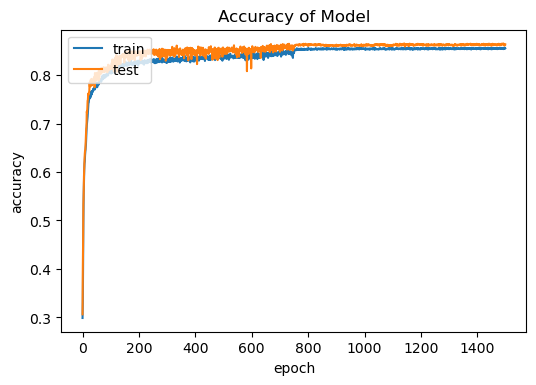

In [53]:
mplot.plot(model_history.history['accuracy'] + model_history_recompiled.history['accuracy'])
mplot.plot(model_history.history['val_accuracy'] + model_history_recompiled.history['val_accuracy'])
mplot.title('Accuracy of Model')
mplot.ylabel('accuracy')
mplot.xlabel('epoch')
mplot.legend(['train', 'test'], loc='upper left')
mplot.rcParams['figure.dpi'] = 100
mplot.show()

# GUI embedding plots of Model Loss

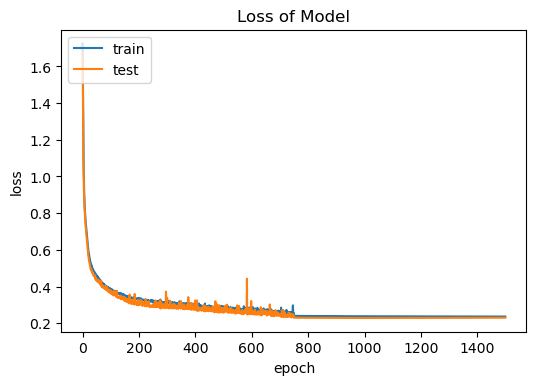

In [58]:
mplot.plot(model_history.history['loss'] + model_history_recompiled.history['loss'])
mplot.plot(model_history.history['val_loss'] + model_history_recompiled.history['val_loss'])
mplot.title('Loss of Model')
mplot.ylabel('loss')
mplot.xlabel('epoch')
mplot.legend(['train', 'test'], loc='upper left')
mplot.rcParams['figure.dpi'] = 10
mplot.show()